In [ ]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
# THIS IS TO PRINT REQUESTS TO TEST IF YOU CAN ACCESS THE API!!!
import requests
from bs4 import BeautifulSoup
import json
import datetime
datetime.datetime.fromtimestamp(1708455782).isoformat()

# Define the URL for the stock you're interested in (e.g., CLNE)
url = 'https://finance.yahoo.com/quote/CLNE/community'

# Make an HTTP request to fetch the page content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'})
soup = BeautifulSoup(response.text, 'html.parser')

# Extract relevant data from the page
data = json.loads(soup.select_one('#spotim-config').get_text(strip=True))['config']

# Set up the API endpoint for fetching comments
api_url = 'https://api-2-0.spot.im/v1.0.0/conversation/read'
payload = json.dumps({
    'conversation_id': data['spotId'] + data['uuid'].replace('_', '$'),
    'count': 250,  # Adjust as needed
    'offset': 0
})
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
    'Content-Type': 'application/json',
    'x-spot-id': data['spotId'],
    'x-post-id': data['uuid'].replace('_', '$'),
}

# Fetch comments using the API
response = requests.post(api_url, headers=headers, data=payload)
comments_data = response.json()

for comment in comments_data['conversation']['comments']:
    author = comment['conversation_id']  # Assuming 'user_id' contains the author's identifier
    content = ""
    for item in comment['content']:
        if 'text' in item:
            content += item['text']
        elif 'type' in item and item['type'] == 'text':
            content += item['data']
    post_time = comment['time']  # Convert to a readable format if needed
    print(f"Conversation ID: {author}\nContent: {content}\nPost Time: {datetime.datetime.fromtimestamp(post_time).isoformat()}\n---")


Conversation ID: sp_Rba9aFpG_finmb$1543272
Content: <p>Reality check!! Search for this, &#34;Heavy-Truck Emissions Rules: A Disaster in the Making&#34;</p><p></p><p>Without a dose of socialism it won&#39;t happen!!!</p>
Post Time: 2024-04-05T16:57:25
---
Conversation ID: sp_Rba9aFpG_finmb$1543272
Content: <p>Cummins already has sold 40,000 of the X15N engines in China where they debuted in 2020. It expects to sell 3,000 stateside this year, and its top on-highway executive predicts penetration could eventually reach 10% of the approximately 300,000 engines sold annually. Whether that fivefold increase materializes is unknown.</p>
Post Time: 2024-04-03T05:12:14
---
Conversation ID: sp_Rba9aFpG_finmb$1543272
Content: <p><strong>TAXES are Due .</strong></p><p>Do you sell a good stock or a DOG Stock to pay your Taxes?</p><p></p><p>CLNE might have a tough couple of weeks in front of them.</p>
Post Time: 2024-04-02T14:02:42
---
Conversation ID: sp_Rba9aFpG_finmb$1543272
Content: <p>A very in

In [2]:
import requests
from bs4 import BeautifulSoup
import json
import datetime
import pandas as pd

# Define the URL for the stock you're interested in (e.g., CLNE)
url = 'https://finance.yahoo.com/quote/CLNE/community'

# Make an HTTP request to fetch the page content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'})
soup = BeautifulSoup(response.text, 'html.parser')

# Extract relevant data from the page
data = json.loads(soup.select_one('#spotim-config').get_text(strip=True))['config']

# Set up the API endpoint for fetching comments
api_url = 'https://api-2-0.spot.im/v1.0.0/conversation/read'
payload = json.dumps({
    'conversation_id': data['spotId'] + data['uuid'].replace('_', '$'),
    'count': 250,  # Adjust as needed
    'offset': 0
})
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
    'Content-Type': 'application/json',
    'x-spot-id': data['spotId'],
    'x-post-id': data['uuid'].replace('_', '$'),
}

# Fetch comments using the API
response = requests.post(api_url, headers=headers, data=payload)
comments_data = response.json()

# Prepare data for DataFrame
comment_list = []
for comment in comments_data['conversation']['comments']:
    author = comment['conversation_id']  # Assuming 'user_id' contains the author's identifier
    content = ""
    for item in comment['content']:
        if 'text' in item:
            content += item['text']
        elif 'type' in item and item['type'] == 'text':
            content += item['data']
    post_time = datetime.datetime.fromtimestamp(comment['time']).isoformat()  # Convert to a readable format
    comment_list.append({'Conversation ID': author, 'Content': content, 'Post Time': post_time})

# Create DataFrame
df = pd.DataFrame(comment_list)

# Save DataFrame to CSV
#df.to_csv('comments.csv', index=False)

df


,Conversation ID,Content,Post Time
0,sp_Rba9aFpG_finmb$1543272,"<p>Reality check!! Search for this, &#34;Heavy...",2024-04-05T16:57:25
1,sp_Rba9aFpG_finmb$1543272,"<p>Cummins already has sold 40,000 of the X15N...",2024-04-03T05:12:14
2,sp_Rba9aFpG_finmb$1543272,<p><strong>TAXES are Due .</strong></p><p>Do y...,2024-04-02T14:02:42
3,sp_Rba9aFpG_finmb$1543272,<p>A very interesting article in FreightWaves ...,2024-04-02T12:59:10
4,sp_Rba9aFpG_finmb$1543272,Littlefair needs to just go away...pooophh. pl...,2024-04-01T02:33:56
...,...,...,...
81,sp_Rba9aFpG_finmb$1543272,<p>There is no bottom here.</p><p>Going to low...,2024-03-04T21:02:44
82,sp_Rba9aFpG_finmb$1543272,I&#39;m in still at $7.97 per share. I don&#39...,2024-03-04T20:36:47
83,sp_Rba9aFpG_finmb$1543272,So this is considered a penny stock now. Any ...,2024-03-04T00:29:42
84,sp_Rba9aFpG_finmb$1543272,<p>It&#39;s all just a matter of time. It&#39...,2024-03-03T02:49:19


In [3]:
import requests
from bs4 import BeautifulSoup
import json
import datetime
import pandas as pd

# Define the URL for the stock you're interested in (Example CLNE)
url = 'https://finance.yahoo.com/quote/CLNE/community'

# Make an HTTP request to fetch the page content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'})
soup = BeautifulSoup(response.text, 'html.parser')

# Extract relevant data from the page
data = json.loads(soup.select_one('#spotim-config').get_text(strip=True))['config']

# Set up the API endpoint for fetching comments
api_url = 'https://api-2-0.spot.im/v1.0.0/conversation/read'
payload = json.dumps({
    'conversation_id': data['spotId'] + data['uuid'].replace('_', '$'),
    'count': 250,  # Adjust as needed
    'offset': 0
})
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
    'Content-Type': 'application/json',
    'x-spot-id': data['spotId'],
    'x-post-id': data['uuid'].replace('_', '$'),
}

# Fetch comments using the API
response = requests.post(api_url, headers=headers, data=payload)
comments_data = response.json()

# Prepare data for DataFrame
comment_list = []
for comment in comments_data['conversation']['comments']:
    author = comment['conversation_id']  # Assuming 'user_id' contains the author's identifier
    content = ""
    for item in comment['content']:
        if 'text' in item:
            content += item['text']
        elif 'type' in item and item['type'] == 'text':
            content += item['data']
    post_time = datetime.datetime.fromtimestamp(comment['time']).isoformat()  # Convert to a readable format
    comment_list.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': author, 'Content': content, 'Post Time': post_time})
#For now in this rough version, everytime we change the link we have to change the company name in 'company' : '[enter company name here]'

# Create DataFrame to make sure it is good in python
df = pd.DataFrame(comment_list)

# Save DataFrame to CSV
#df.to_csv('comments.csv', index=False)

df

,Company,Conversation ID,Content,Post Time
0,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,"<p>Reality check!! Search for this, &#34;Heavy...",2024-04-05T16:57:25
1,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,"<p>Cummins already has sold 40,000 of the X15N...",2024-04-03T05:12:14
2,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,<p><strong>TAXES are Due .</strong></p><p>Do y...,2024-04-02T14:02:42
3,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,<p>A very interesting article in FreightWaves ...,2024-04-02T12:59:10
4,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,Littlefair needs to just go away...pooophh. pl...,2024-04-01T02:33:56
...,...,...,...,...
81,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,<p>There is no bottom here.</p><p>Going to low...,2024-03-04T21:02:44
82,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,I&#39;m in still at $7.97 per share. I don&#39...,2024-03-04T20:36:47
83,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,So this is considered a penny stock now. Any ...,2024-03-04T00:29:42
84,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,<p>It&#39;s all just a matter of time. It&#39...,2024-03-03T02:49:19


In [4]:
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For web scraping
import json  # For handling JSON data coming from the HTTP request
import datetime  # For changing timestamps to understandable dates
import pandas as pd  # For building data frames
import re  # For regular expressions, this is used for fixing our panda and is originally from the HARP 150 course I took a year ago


# Defines the URL for the stock you're interested in (in this case: CLNE); Originally had to change the
url = 'https://finance.yahoo.com/quote/CLNE/community'

# Makes an HTTP request to fetch the page content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'})
soup = BeautifulSoup(response.text, 'html.parser')

# This is to extract relevant data from the page
data = json.loads(soup.select_one('#spotim-config').get_text(strip=True))['config']

# Sets up the API endpoint for fetching comments
api_url = 'https://api-2-0.spot.im/v1.0.0/conversation/read'
payload = json.dumps({
    'conversation_id': data['spotId'] + data['uuid'].replace('_', '$'), #learned I needed this from this stack overflow webpage on web scrapping from yahoo finance: https://stackoverflow.com/questions/75528960/extracting-replies-from-yahoo-finance-forum
    'count': 250,  # Can adjust as needed
    'offset': 0
})
headers = { # Had to request data as Firefox Mozilla because Microsoft Edge kept giving problems.
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
    'Content-Type': 'application/json', # Requesting a json because I only know how to process jsons
    'x-spot-id': data['spotId'],   # Learned that api it communicated with spotId needed these headers to communicate with the yahoo finance api on https://stackoverflow.com/questions/75528960/extracting-replies-from-yahoo-finance-forum
    'x-post-id': data['uuid'].replace('_', '$'),
}

# Fetch comments using the API
response = requests.post(api_url, headers=headers, data=payload)
comments_data = response.json()

# Prepare data for DataFrame
comment_list = []
for comment in comments_data['conversation']['comments']:
    Commentid = comment['conversation_id']  # Assuming 'conversation_id' is id because it shortens it
    content = ""
    for item in comment['content']: #Had to include this loop because content for replies would show a key error because replies do not contain content under a 'text' key in the dictionary response
        if 'text' in item:
            content += item['text']
        elif 'type' in item and item['type'] == 'text':
            content += item['data']

    # Removes HTML tags using regular expressions
    content = re.sub(r'<[^>]*>', '', content)

    # Replaces '&#39;' with "'", because some comments that said can't showed up as can&#39t;
    content = content.replace('&#39;', "'")

    #Change 'Clean Energy Fuels Corp' in 'Company': 'Clean Energy Fuels Corp' to company webpage you are looking at, that way comments are attributed to the clean energy site it is from
    post_time = datetime.datetime.fromtimestamp(comment['time']).isoformat()  # Convert to a readable format
    comment_list.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': Commentid, 'Content': content, 'Post Time': post_time})

# Create DataFrame to check in python if it works, then can use df to check if the content is good
df = pd.DataFrame(comment_list)

# Can use this code to make a csv if we think it is worth looking at
#df.to_csv('comments.csv', index=False)

df


,Company,Conversation ID,Content,Post Time
0,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,"Reality check!! Search for this, &#34;Heavy-Tr...",2024-04-05T16:57:25
1,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,"Cummins already has sold 40,000 of the X15N en...",2024-04-03T05:12:14
2,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,TAXES are Due .Do you sell a good stock or a D...,2024-04-02T14:02:42
3,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,A very interesting article in FreightWaves abo...,2024-04-02T12:59:10
4,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,Littlefair needs to just go away...pooophh. pl...,2024-04-01T02:33:56
...,...,...,...,...
81,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,There is no bottom here.Going to low 1 and rs.,2024-03-04T21:02:44
82,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,I'm in still at $7.97 per share. I don't see a...,2024-03-04T20:36:47
83,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,So this is considered a penny stock now. Any ...,2024-03-04T00:29:42
84,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272,It's all just a matter of time. It's inevitab...,2024-03-03T02:49:19


In [5]:
df = []

In [6]:
import requests
from bs4 import BeautifulSoup
import json
import datetime
import pandas as pd
import re

one_year_ago = datetime.datetime.now() - datetime.timedelta(days=365)

# Define the URL for the stock you're interested in (e.g., CLNE)
url = 'https://finance.yahoo.com/quote/CLNE/community'

# Make an HTTP request to fetch the page content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'})
soup = BeautifulSoup(response.text, 'html.parser')

# Extract relevant data from the page
data = json.loads(soup.select_one('#spotim-config').get_text(strip=True))['config']

# Set up the API endpoint for fetching comments
api_url = 'https://api-2-0.spot.im/v1.0.0/conversation/read'
payload = {
    'conversation_id': data['spotId'] + data['uuid'].replace('_', '$'),
    'count': 1000,  # Adjust as needed
    'offset': 200
}
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
    'Content-Type': 'application/json',
    'x-spot-id': data['spotId'],
    'x-post-id': data['uuid'].replace('_', '$'),
}

# Fetch comments using the API and implement pagination
comment_list = []
while True:
    # Make a request to fetch comments using the API
    response = requests.post(api_url, headers=headers, json=payload)
    comments_data = response.json()

    # Extract comments from the response and add them to the list
    for comment in comments_data['conversation']['comments']:
        # Append comment to the list
        comment_list.append(comment)

    # Check if there are more comments to fetch
    if not comments_data.get('conversation', {}).get('comments') or len(comment_list) >= 250:
        # Break the loop if all comments are fetched or if there are no more comments
        break

    # Increment the offset for the next request
    payload['offset'] += payload['count']

# Prepare data for DataFrame
processed_comments = []
for comment in comment_list:
    # Process comments here...
    Reply = False
    author = comment['root_comment']  # Assuming 'user_id' contains the author's identifier
    content = ""
    for item in comment['content']:
        if 'text' in item:
            content += item['text']
        elif 'type' in item and item['type'] == 'text':
            content += item['data']

    if 'replies' in comment:
        for reply in comment['replies']:
            reply_true = True
            reply_author = reply['root_comment']
            reply_content = ""
            for item in reply['content']:
                if 'text' in item:
                    reply_content += item['text']
                elif 'type' in item and item['type'] == 'text':
                    reply_content += item['data']
            # Convert to a readable format if needed
            reply_post_time = datetime.datetime.fromtimestamp(reply['time']).isoformat()
            processed_comments.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': reply_author, 'Content': reply_content, 'Post Time': reply_post_time, 'Reply': reply_true})

    # Removes HTML tags using regular expressions
    content = re.sub(r'<[^>]*>', '', content)

    # Replaces '&#39;' with "'", because some comments that were said can't showed up as can&#39t;
    content = content.replace('&#39;', "'")

    #Change 'Clean Energy Fuels Corp' in 'Company': 'Clean Energy Fuels Corp' to company webpage you are looking at, that way comments are attributed to the clean energy site it is from
    post_time = datetime.datetime.fromtimestamp(comment['time']).isoformat()  # Convert to a readable format
    processed_comments.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': author, 'Content': content, 'Post Time': post_time, 'Reply': Reply})

# Create DataFrame
df = pd.DataFrame(processed_comments)

# Save DataFrame to CSV
# df.to_csv('comments.csv', index=False)

df



,Company,Conversation ID,Content,Post Time,Reply
0,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2bp7bXtgi27QjNSMP4...,<p>CLNE : Catastrophic Leadership Not Efficien...,2024-02-05T14:03:58,True
1,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2bp7bXtgi27QjNSMP4...,Amazing how you can be the CEO of a company an...,2024-02-02T18:57:17,False
2,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2boyexW3AhIdSGKtXD...,<p>No free psychiatrists here.</p>,2024-02-02T21:11:24,True
3,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2boyexW3AhIdSGKtXD...,<p>True. Best hope is for a buyout and there w...,2024-02-02T17:57:50,True
4,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2boyexW3AhIdSGKtXD...,I have owned this stock for three years. It’s ...,2024-02-02T17:43:44,False
...,...,...,...,...,...
535,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_3b496592-0bd7-4a0b...,nothing change....noob....,2021-12-06T19:17:01,True
536,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_3b496592-0bd7-4a0b...,Buy buy and hold for long term trip to the moon,2021-12-06T18:31:11,False
537,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_d7cc5795-dd65-4ce7...,They keep saying the next 1/4 is going to be g...,2021-12-07T00:03:31,True
538,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_d7cc5795-dd65-4ce7...,You have not had this stock long. They have b...,2021-12-06T23:53:03,True


In [7]:
import requests
from bs4 import BeautifulSoup
import json
import datetime
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

one_year_ago = datetime.datetime.now() - datetime.timedelta(days=365)

# Define the URL for the stock you're interested in (e.g., CLNE)
url = 'https://finance.yahoo.com/quote/CLNE/community'

# Make an HTTP request to fetch the page content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'})
soup = BeautifulSoup(response.text, 'html.parser')

# Extract relevant data from the page
data = json.loads(soup.select_one('#spotim-config').get_text(strip=True))['config']

# Set up the API endpoint for fetching comments
api_url = 'https://api-2-0.spot.im/v1.0.0/conversation/read'
payload = {
    'conversation_id': data['spotId'] + data['uuid'].replace('_', '$'),
    'count': 1000,  # Adjust as needed
    'offset': 400
}
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
    'Content-Type': 'application/json',
    'x-spot-id': data['spotId'],
    'x-post-id': data['uuid'].replace('_', '$'),
}

# Fetch comments using the API and implement pagination
comment_list = []
while True:
    # Make a request to fetch comments using the API
    response = requests.post(api_url, headers=headers, json=payload)
    comments_data = response.json()

    # Extract comments from the response and add them to the list
    for comment in comments_data['conversation']['comments']:
        # Append comment to the list
        comment_list.append(comment)

    # Check if there are more comments to fetch
    if not comments_data.get('conversation', {}).get('comments') or len(comment_list) >= 250:
        # Break the loop if all comments are fetched or if there are no more comments
        break

    # Increment the offset for the next request
    payload['offset'] += payload['count']

# Prepare data for DataFrame
processed_comments = []
for comment in comment_list:
    # Process comments here...
    Reply = False
    author = comment['root_comment']  # Assuming 'user_id' contains the author's identifier
    content = ""
    for item in comment['content']:
        if 'text' in item:
            content += item['text']
        elif 'type' in item and item['type'] == 'text':
            content += item['data']

    if 'replies' in comment:
        for reply in comment['replies']:
            reply_true = True
            reply_author = reply['root_comment']
            reply_content = ""
            for item in reply['content']:
                if 'text' in item:
                    reply_content += item['text']
                elif 'type' in item and item['type'] == 'text':
                    reply_content += item['data']
            # Convert to a readable format if needed
            reply_content = re.sub(r'<[^>]*>', '', reply_content)
            reply_content = reply_content.replace('&#39;', "'")
            reply_post_time = datetime.datetime.fromtimestamp(reply['time']).isoformat()
            processed_comments.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': reply_author, 'Content': reply_content, 'Post Time': reply_post_time, 'Reply': reply_true})

    # Removes HTML tags using regular expressions
    content = re.sub(r'<[^>]*>', '', content)

    # Replaces '&#39;' with "'", because some comments that were said can't showed up as can&#39t;
    content = content.replace('&#39;', "'")

    #Change 'Clean Energy Fuels Corp' in 'Company': 'Clean Energy Fuels Corp' to company webpage you are looking at, that way comments are attributed to the clean energy site it is from
    post_time = datetime.datetime.fromtimestamp(comment['time']).isoformat()  # Convert to a readable format
    # Perform sentiment analysis on the comment
    sentiment_score = sid.polarity_scores(content)
    sentiment_label = 'Positive' if sentiment_score['compound'] > 0 else 'Negative' if sentiment_score['compound'] < 0 else 'Neutral'
    processed_comments.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': author, 'Content': content, 'Post Time': post_time, 'Sentiment': sentiment_label, 'Sentiment Score': sentiment_score['compound'], 'Reply': Reply})

# Create DataFrame
df = pd.DataFrame(processed_comments)

# Save DataFrame to CSV
# df.to_csv('comments.csv', index=False)

df


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Company,Conversation ID,Content,Post Time,Reply,Sentiment,Sentiment Score
0,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2YxIzH8rSKGQw7OtDA...,you have been spewing the same line for years ...,2023-12-02T15:14:10,True,NaN,NaN
1,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2YxIzH8rSKGQw7OtDA...,"don't worry,sooner or later the noob ceo will ...",2023-12-01T21:46:53,True,NaN,NaN
2,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2YxIzH8rSKGQw7OtDA...,&#34;Abandon all hopes ye that enter!&#34;This...,2023-12-06T01:30:21,False,Negative,-0.8640
3,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2YxA5tsbre3fssNVPf...,https://finance.yahoo.com/news/cummins-predict...,2023-12-06T01:30:29,False,Neutral,0.0000
4,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2Ywm94vej4lH97XRfH...,then where are all the natural gas powered veh...,2023-12-05T19:03:30,True,NaN,NaN
...,...,...,...,...,...,...,...
535,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_5a466412-11ab-43b1...,"At this price, $ $8 - $9, CLNE is a great barg...",2021-11-05T19:33:13,False,Positive,0.9217
536,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_4d06df1d-9901-4693...,I don't understand how with these numbers they...,2021-11-05T19:30:44,False,Negative,-0.2263
537,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_ba1d90de-e47d-4ed2...,Bought some more today.First time I have added...,2021-11-05T19:11:59,False,Neutral,0.0000
538,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_5f120fed-8fd3-461b...,"No big volume, no big deal. Sellers will soon ...",2021-11-05T18:45:58,False,Negative,-0.7783


In [8]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

one_year_ago = datetime.datetime.now() - datetime.timedelta(days=365)

# Define the URL for the stock you're interested in (e.g., CLNE)
url = 'https://finance.yahoo.com/quote/CLNE/community'

# Make an HTTP request to fetch the page content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'})
soup = BeautifulSoup(response.text, 'html.parser')

# Extract relevant data from the page
data = json.loads(soup.select_one('#spotim-config').get_text(strip=True))['config']

# Set up the API endpoint for fetching comments
api_url = 'https://api-2-0.spot.im/v1.0.0/conversation/read'
payload = {
    'conversation_id': data['spotId'] + data['uuid'].replace('_', '$'),
    'count': 1000,  # Adjust as needed
    'offset': 3000
}
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
    'Content-Type': 'application/json',
    'x-spot-id': data['spotId'],
    'x-post-id': data['uuid'].replace('_', '$'),
}

# Fetch comments using the API and implement pagination
comment_list = []
while True:
    # Make a request to fetch comments using the API
    response = requests.post(api_url, headers=headers, json=payload)
    comments_data = response.json()

    # Extract comments from the response and add them to the list
    for comment in comments_data['conversation']['comments']:
        # Append comment to the list
        comment_list.append(comment)

    # Check if there are more comments to fetch
    if not comments_data.get('conversation', {}).get('comments') or len(comment_list) >= 250:
        # Break the loop if all comments are fetched or if there are no more comments
        break

    # Increment the offset for the next request
    payload['offset'] += payload['count']

# Prepare data for DataFrame
processed_comments2 = []
for comment in comment_list:
    # Process comments here...
    Reply = False
    author = comment['root_comment']  # Assuming 'user_id' contains the author's identifier
    content = ""
    for item in comment['content']:
        if 'text' in item:
            content += item['text']
        elif 'type' in item and item['type'] == 'text':
            content += item['data']

    if 'replies' in comment:
        for reply in comment['replies']:
            reply_true = True
            reply_author = reply['root_comment']
            reply_content = ""
            for item in reply['content']:
                if 'text' in item:
                    reply_content += item['text']
                elif 'type' in item and item['type'] == 'text':
                    reply_content += item['data']
            # Convert to a readable format if needed
            reply_content = re.sub(r'<[^>]*>', '', reply_content)
            reply_content = reply_content.replace('&#39;', "'")
            reply_post_time = datetime.datetime.fromtimestamp(reply['time']).isoformat()
            processed_comments2.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': reply_author, 'Content': reply_content, 'Post Time': reply_post_time, 'Reply': reply_true})

    # Removes HTML tags using regular expressions
    content = re.sub(r'<[^>]*>', '', content)

    # Replaces '&#39;' with "'", because some comments that were said can't showed up as can&#39t;
    content = content.replace('&#39;', "'")

    #Change 'Clean Energy Fuels Corp' in 'Company': 'Clean Energy Fuels Corp' to company webpage you are looking at, that way comments are attributed to the clean energy site it is from
    post_time = datetime.datetime.fromtimestamp(comment['time']).isoformat()  # Convert to a readable format
    # Perform sentiment analysis on the comment
    sentiment_score = sid.polarity_scores(content)
    sentiment_label = 'Positive' if sentiment_score['compound'] > 0 else 'Negative' if sentiment_score['compound'] < 0 else 'Neutral'
    processed_comments2.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': author, 'Content': content, 'Post Time': post_time, 'Sentiment': sentiment_label, 'Sentiment Score': sentiment_score['compound'], 'Reply': Reply})

# Create DataFrame
df2 = pd.DataFrame(processed_comments2)

# Save DataFrame to CSV
# df.to_csv('comments.csv', index=False)

df = pd.concat([df, df2], ignore_index=True)
df

,Company,Conversation ID,Content,Post Time,Reply,Sentiment,Sentiment Score
0,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2YxIzH8rSKGQw7OtDA...,you have been spewing the same line for years ...,2023-12-02T15:14:10,True,NaN,NaN
1,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2YxIzH8rSKGQw7OtDA...,"don't worry,sooner or later the noob ceo will ...",2023-12-01T21:46:53,True,NaN,NaN
2,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2YxIzH8rSKGQw7OtDA...,&#34;Abandon all hopes ye that enter!&#34;This...,2023-12-06T01:30:21,False,Negative,-0.8640
3,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2YxA5tsbre3fssNVPf...,https://finance.yahoo.com/news/cummins-predict...,2023-12-06T01:30:29,False,Neutral,0.0000
4,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_2Ywm94vej4lH97XRfH...,then where are all the natural gas powered veh...,2023-12-05T19:03:30,True,NaN,NaN
...,...,...,...,...,...,...,...
1023,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_64dfd89b-e0fa-47ef...,Like your bet.....................GL,2021-06-26T21:24:27,True,NaN,NaN
1024,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_64dfd89b-e0fa-47ef...,"CLNE is a winner,come back in 12 months &amp; ...",2021-06-26T19:48:20,False,Positive,0.2960
1025,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_96217df5-5899-4a6c...,Clean Energy Fuels Corp\n$ 10.80\nCLNE\n-0.12\...,2021-06-26T15:52:01,False,Positive,0.9559
1026,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_843fa097-2d7a-4a4b...,With temperatures sky-high in STATES change to...,2021-06-26T15:44:14,False,Positive,0.6688


In [10]:
df3 = df
# Assuming df is your DataFrame
df3 = df3.drop_duplicates()
df3
df3.to_csv('CLNEcomments.csv', index=False)

<ipython-input-11-054ccda5e0fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_comments['Post Time'] = pd.to_datetime(positive_comments['Post Time'])
<ipython-input-11-054ccda5e0fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_comments['Post Time'] = pd.to_datetime(negative_comments['Post Time'])


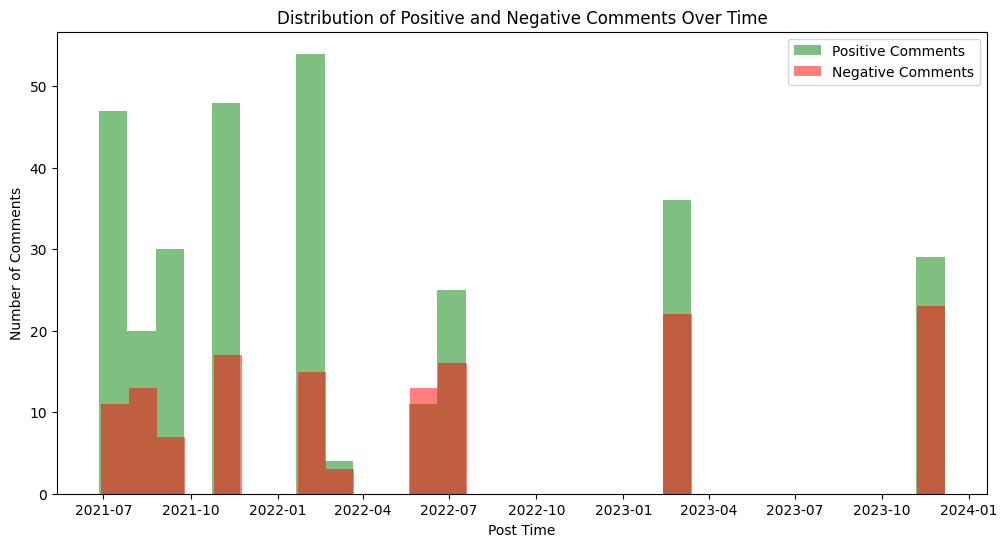

<ipython-input-11-054ccda5e0fd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_comments['Month'] = negative_comments['Post Time'].dt.to_period('M')
<ipython-input-11-054ccda5e0fd>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_comments['Month'] = positive_comments['Post Time'].dt.to_period('M')


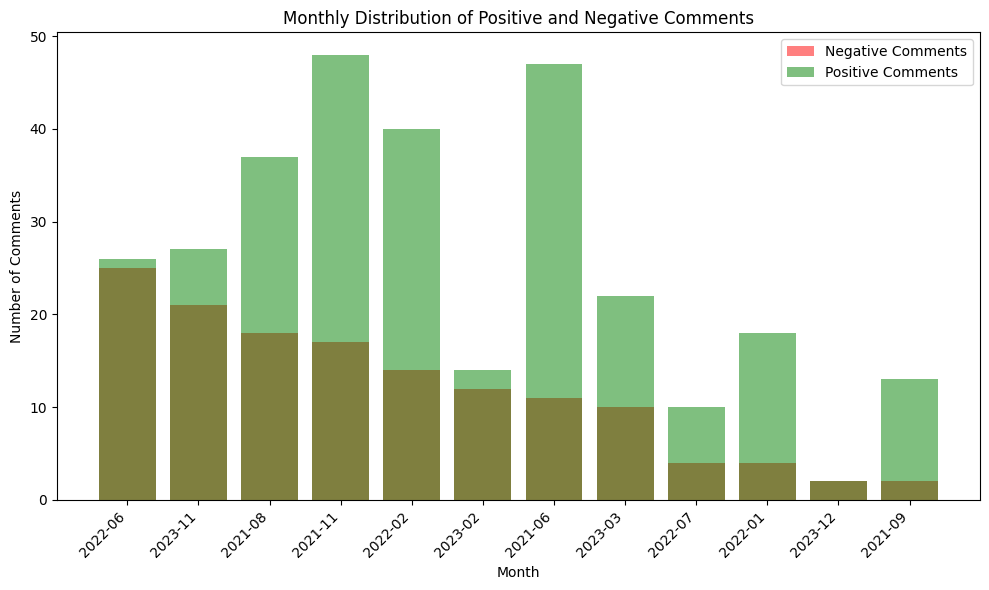

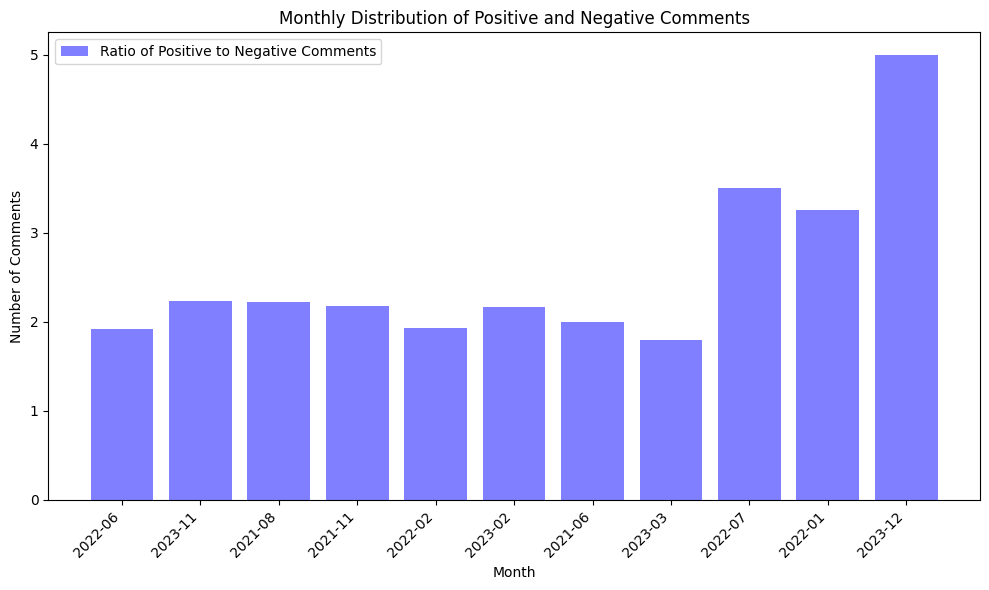

In [11]:
# Separate positive and negative comments
positive_comments = df3[df3['Sentiment'] == 'Positive']
negative_comments = df3[df3['Sentiment'] == 'Negative']

# Analyze timing of positive and negative comments
positive_comments['Post Time'] = pd.to_datetime(positive_comments['Post Time'])
negative_comments['Post Time'] = pd.to_datetime(negative_comments['Post Time'])

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(positive_comments['Post Time'], bins=30, color='green', alpha=0.5, label='Positive Comments')
plt.hist(negative_comments['Post Time'], bins=30, color='red', alpha=0.5, label='Negative Comments')
plt.xlabel('Post Time')
plt.ylabel('Number of Comments')
plt.title('Distribution of Positive and Negative Comments Over Time')
plt.legend()
plt.show()

negative_comments['Month'] = negative_comments['Post Time'].dt.to_period('M')

# Count occurrences of each month
negative_monthly_counts = negative_comments['Month'].value_counts()

positive_comments['Month'] = positive_comments['Post Time'].dt.to_period('M')

# Count occurrences of each month
positive_monthly_counts = positive_comments['Month'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(negative_monthly_counts.index.astype(str), negative_monthly_counts.values, color='red', alpha=0.5, label='Negative Comments')
plt.bar(positive_monthly_counts.index.astype(str), positive_monthly_counts.values, color='green', alpha=0.5, label='Positive Comments')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.title('Monthly Distribution of Positive and Negative Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

negative_monthly_counts = negative_monthly_counts[:-1]
positive_monthly_counts = positive_monthly_counts[:-1]

plt.figure(figsize=(10, 6))
plt.bar(negative_monthly_counts.index.astype(str),  positive_monthly_counts.values/negative_monthly_counts.values, color='blue', alpha=0.5, label='Ratio of Positive to Negative Comments')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.title('Monthly Distribution of Positive and Negative Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### WORKING ON MAKING A LOOP FOR OFFSET

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import datetime
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

global df

offset = 0

columns = ['Company', 'Conversation ID', 'Content', 'Post Time', 'Sentiment', 'Sentiment Score', 'Reply']


#df = pd.DataFrame(columns=columns) Include this as a function when starting this from scratch

while offset <= 3000:
    # Define the URL for the stock you're interested in (e.g., CLNE)
    url = 'https://finance.yahoo.com/quote/CLNE/community'

    # Make an HTTP request to fetch the page content
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0'})
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract relevant data from the page
    data = json.loads(soup.select_one('#spotim-config').get_text(strip=True))['config']

    # Set up the API endpoint for fetching comments
    api_url = 'https://api-2-0.spot.im/v1.0.0/conversation/read'
    payload = {
        'conversation_id': data['spotId'] + data['uuid'].replace('_', '$'),
        'count': 1000,  # Adjust as needed
        'offset': offset #adjust as needed
    }
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
        'Content-Type': 'application/json',
        'x-spot-id': data['spotId'],
        'x-post-id': data['uuid'].replace('_', '$'),
    }

    # Fetch comments using the API and implement pagination
    comment_list = []
    while True:
        # Make a request to fetch comments using the API
        response = requests.post(api_url, headers=headers, json=payload)
        comments_data = response.json()

        # Extract comments from the response and add them to the list
        for comment in comments_data['conversation']['comments']:
            # Append comment to the list
            comment_list.append(comment)

        # Check if there are more comments to fetch
        if not comments_data.get('conversation', {}).get('comments') or len(comment_list) >= 250:
            # Break the loop if all comments are fetched or if there are no more comments
            break

        # Increment the offset for the next request
        payload['offset'] += payload['count']

    # Prepare data for DataFrame
    processed_comments = []
    for comment in comment_list:
        # Process comments here...
        Reply = False
        author = comment['root_comment']  # Assuming 'user_id' contains the author's identifier
        content = ""
        for item in comment['content']:
            if 'text' in item:
                content += item['text']
            elif 'type' in item and item['type'] == 'text':
                content += item['data']

        if 'replies' in comment:
            for reply in comment['replies']:
                reply_true = True
                reply_author = reply['root_comment']
                reply_content = ""
                for item in reply['content']:
                    if 'text' in item:
                        reply_content += item['text']
                    elif 'type' in item and item['type'] == 'text':
                        reply_content += item['data']
                # Convert to a readable format if needed

                reply_content = re.sub(r'<[^>]*>', '', reply_content)

                reply_content = reply_content.replace('&#39;', "'")

                reply_post_time = datetime.datetime.fromtimestamp(reply['time']).isoformat()
                processed_comments.append({'Company': 'Clean Energy Fuels Corp', 'Conversation ID': reply_author, 'Content': reply_content, 'Post Time': reply_post_time, 'Reply': reply_true})

        # Removes HTML tags using regular expressions
        content = re.sub(r'<[^>]*>', '', content)

        # Replaces '&#39;' with "'", because some comments that were said can't showed up as can&#39t;
        content = content.replace('&#39;', "'")

        sentiment_score = sid.polarity_scores(content)
        sentiment_label = 'Positive' if sentiment_score['compound'] > 0 else 'Negative' if sentiment_score['compound'] < 0 else 'Neutral'

        #Change 'Clean Energy Fuels Corp' in 'Company': 'Clean Energy Fuels Corp' to company webpage you are looking at, that way comments are attributed to the clean energy site it is from
        post_time = datetime.datetime.fromtimestamp(comment['time']).isoformat()  # Convert to a readable format

        # Perform sentiment analysis on the comment
        processed_comments.append({'Company': 'iShares Global Clean Energy ETF.', 'Conversation ID': author, 'Content': content, 'Post Time': post_time, 'Sentiment': sentiment_label, 'Sentiment Score': sentiment_score['compound'], 'Reply': Reply})

    # Create DataFrame
    df2 = pd.DataFrame(processed_comments)
    offset = offset + 100
    df = pd.concat([df, df2], ignore_index=True)
    print(offset)

df


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


,Company,Conversation ID,Content,Post Time,Sentiment,Sentiment Score,Reply
0,VanEck Low Carbon Energy ETF,sp_Rba9aFpG_finmb$34338017_c_f8417d6e-5b1f-4c6...,I wish smog was weighted a little less in EV.,2022-02-08T09:20:51,Positive,0.1280,False
1,US Nuclear Corp.,sp_Rba9aFpG_finmb$10015487_c_2ednUDpm67og93cGR...,Interesting that Lingren came out of retiremen...,2024-04-04T11:09:04,Positive,0.4019,False
2,US Nuclear Corp.,sp_Rba9aFpG_finmb$10015487_c_2edaEmiCN4U3x8lSS...,UCLE has less than $1mm in annual revenuesUCLE...,2024-04-04T09:20:00,Negative,-0.7135,False
3,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$10015487_c_2eYXhBaMjPzXE9ZjH...,They’re the only company in the world that dev...,2024-04-02T15:35:03,NaN,NaN,True
4,US Nuclear Corp.,sp_Rba9aFpG_finmb$10015487_c_2eYXhBaMjPzXE9ZjH...,Ucle has ownership in Mifti and Miftec whose p...,2024-04-02T14:30:28,Positive,0.4019,False
...,...,...,...,...,...,...,...
16614,iShares Global Clean Energy ETF.,sp_Rba9aFpG_finmb$1543272_c_321d1ef9-1fa0-4c8e...,Short interest up from 8 million to 14 million,2021-06-26T10:06:20,Positive,0.4588,False
16615,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_c9ce416a-126d-49aa...,@ketan Because management has long record of m...,2021-06-29T11:55:59,NaN,NaN,True
16616,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_c9ce416a-126d-49aa...,@Benny Why?,2021-06-28T13:34:12,NaN,NaN,True
16617,iShares Global Clean Energy ETF.,sp_Rba9aFpG_finmb$1543272_c_c9ce416a-126d-49aa...,Be in 8s by end of next month.,2021-06-25T23:38:01,Neutral,0.0000,False


In [ ]:
df3 = df
# Assuming df is your DataFrame
df3 = df3.drop_duplicates()
df3

,Company,Conversation ID,Content,Post Time,Sentiment,Sentiment Score,Reply
0,VanEck Low Carbon Energy ETF,sp_Rba9aFpG_finmb$34338017_c_f8417d6e-5b1f-4c6...,I wish smog was weighted a little less in EV.,2022-02-08T09:20:51,Positive,0.1280,False
1,US Nuclear Corp.,sp_Rba9aFpG_finmb$10015487_c_2ednUDpm67og93cGR...,Interesting that Lingren came out of retiremen...,2024-04-04T11:09:04,Positive,0.4019,False
2,US Nuclear Corp.,sp_Rba9aFpG_finmb$10015487_c_2edaEmiCN4U3x8lSS...,UCLE has less than $1mm in annual revenuesUCLE...,2024-04-04T09:20:00,Negative,-0.7135,False
3,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$10015487_c_2eYXhBaMjPzXE9ZjH...,They’re the only company in the world that dev...,2024-04-02T15:35:03,NaN,NaN,True
4,US Nuclear Corp.,sp_Rba9aFpG_finmb$10015487_c_2eYXhBaMjPzXE9ZjH...,Ucle has ownership in Mifti and Miftec whose p...,2024-04-02T14:30:28,Positive,0.4019,False
...,...,...,...,...,...,...,...
16614,iShares Global Clean Energy ETF.,sp_Rba9aFpG_finmb$1543272_c_321d1ef9-1fa0-4c8e...,Short interest up from 8 million to 14 million,2021-06-26T10:06:20,Positive,0.4588,False
16615,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_c9ce416a-126d-49aa...,@ketan Because management has long record of m...,2021-06-29T11:55:59,NaN,NaN,True
16616,Clean Energy Fuels Corp,sp_Rba9aFpG_finmb$1543272_c_c9ce416a-126d-49aa...,@Benny Why?,2021-06-28T13:34:12,NaN,NaN,True
16617,iShares Global Clean Energy ETF.,sp_Rba9aFpG_finmb$1543272_c_c9ce416a-126d-49aa...,Be in 8s by end of next month.,2021-06-25T23:38:01,Neutral,0.0000,False


C:\Users\hbrun\AppData\Local\Temp\ipykernel_10656\1260548991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_comments['Post Time'] = pd.to_datetime(positive_comments['Post Time'])
C:\Users\hbrun\AppData\Local\Temp\ipykernel_10656\1260548991.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_comments['Post Time'] = pd.to_datetime(negative_comments['Post Time'])


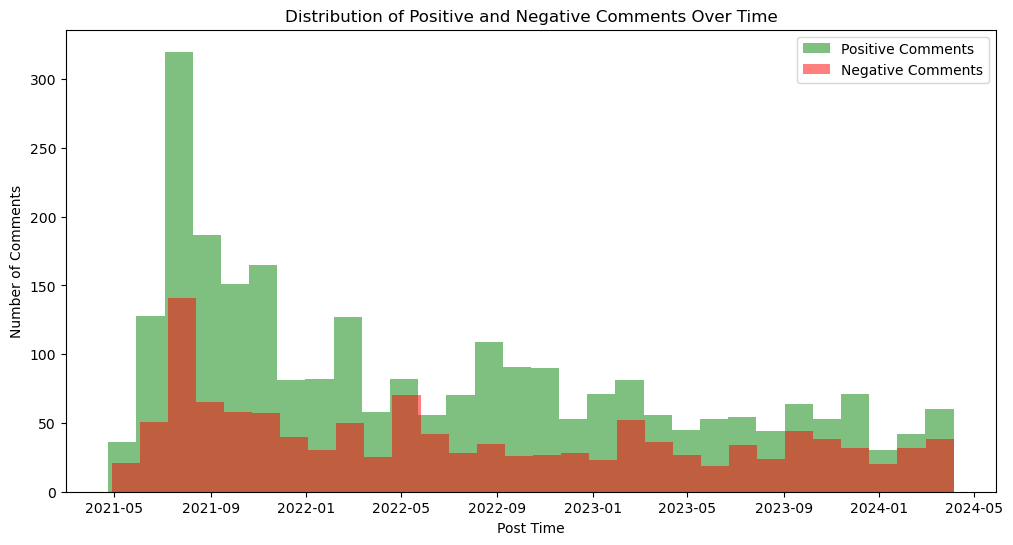

C:\Users\hbrun\AppData\Local\Temp\ipykernel_10656\1260548991.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_comments['Month'] = negative_comments['Post Time'].dt.to_period('M')
C:\Users\hbrun\AppData\Local\Temp\ipykernel_10656\1260548991.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_comments['Month'] = positive_comments['Post Time'].dt.to_period('M')


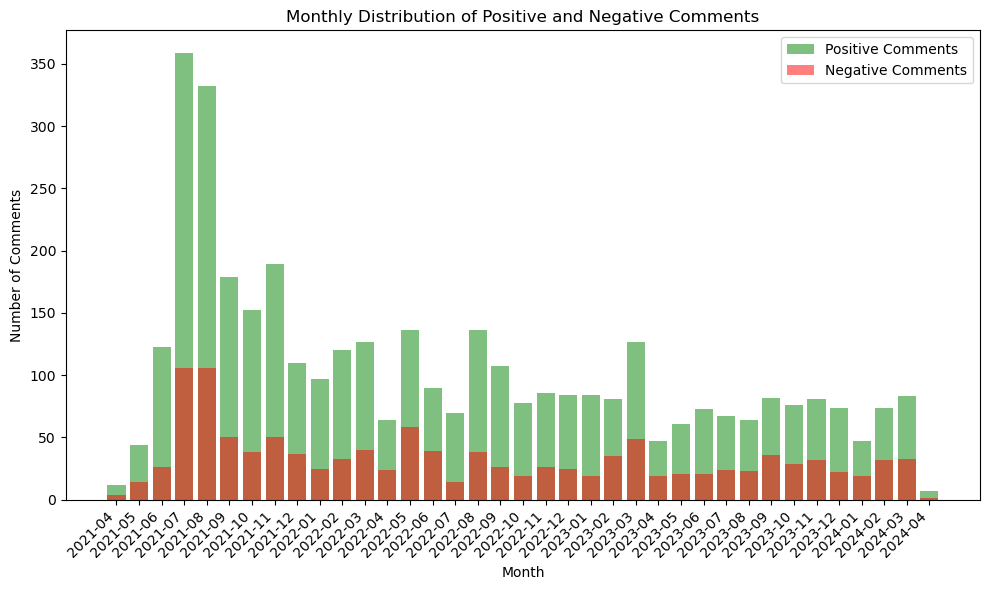

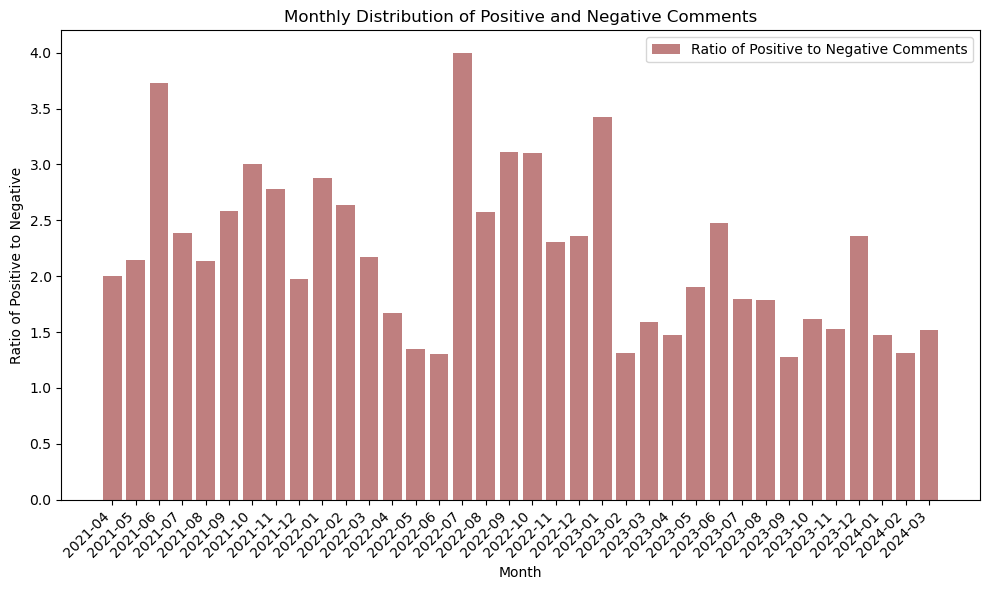

In [ ]:
# Separate positive and negative comments
positive_comments = df3[df3['Sentiment'] == 'Positive']
negative_comments = df3[df3['Sentiment'] == 'Negative']

# Analyze timing of positive and negative comments
positive_comments['Post Time'] = pd.to_datetime(positive_comments['Post Time'])
negative_comments['Post Time'] = pd.to_datetime(negative_comments['Post Time'])

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(positive_comments['Post Time'], bins=30, color='green', alpha=0.5, label='Positive Comments')
plt.hist(negative_comments['Post Time'], bins=30, color='red', alpha=0.5, label='Negative Comments')
plt.xlabel('Post Time')
plt.ylabel('Number of Comments')
plt.title('Distribution of Positive and Negative Comments Over Time')
plt.legend()
plt.show()

negative_comments['Month'] = negative_comments['Post Time'].dt.to_period('M')

# Count occurrences of each month
negative_monthly_counts = negative_comments['Month'].value_counts()

positive_comments['Month'] = positive_comments['Post Time'].dt.to_period('M')

# Count occurrences of each month
positive_monthly_counts = positive_comments['Month'].value_counts()

negative_monthly_counts = negative_monthly_counts.sort_index()
positive_monthly_counts = positive_monthly_counts.sort_index()

plt.figure(figsize=(10, 6))
plt.bar(positive_monthly_counts.index.astype(str), positive_monthly_counts.values+negative_monthly_counts.values, color='green', alpha=0.5, label='Positive Comments')
plt.bar(negative_monthly_counts.index.astype(str), negative_monthly_counts.values, color='red', alpha=.5, label='Negative Comments')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.title('Monthly Distribution of Positive and Negative Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

negative_monthly_counts = negative_monthly_counts[:-1]
positive_monthly_counts = positive_monthly_counts[:-1]

plt.figure(figsize=(10, 6))
plt.bar(negative_monthly_counts.index.astype(str),  positive_monthly_counts.values/negative_monthly_counts.values, color='maroon', alpha=0.5, label='Ratio of Positive to Negative Comments')
plt.xlabel('Month')
plt.ylabel('Ratio of Positive to Negative')
plt.title('Monthly Distribution of Positive and Negative Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

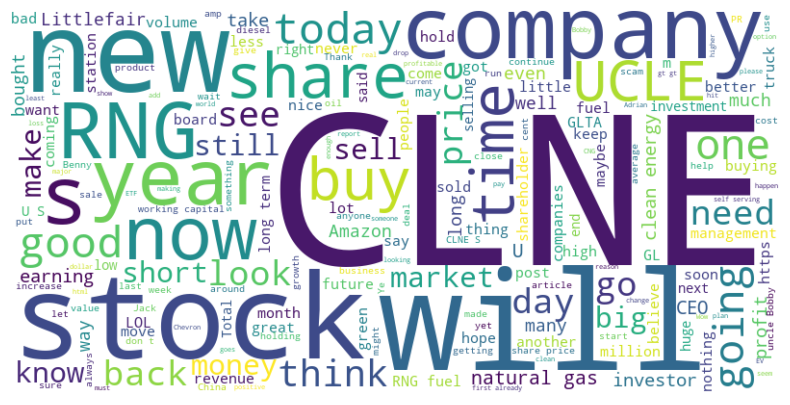

In [ ]:
from wordcloud import WordCloud

# Combine text data from relevant columns (if needed)
text = ' '.join(df3['Content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df4 = df3

# Convert 'Post Time' column to datetime if it's not already
df4['Post Time'] = pd.to_datetime(df4['Post Time'])

# Filter out rows with NaN values in the 'Sentiment' column
df_filtered = df4.dropna(subset=['Sentiment'])

# Group the DataFrame by the date and 'Sentiment' columns
grouped = df_filtered.groupby([df_filtered['Post Time'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

# Calculate the percentage of negative and positive sentiments for each date
grouped['Total'] = grouped.sum(axis=1)
grouped['Negative %'] = (grouped['Negative'] / grouped['Total']) * 100
grouped['Positive %'] = (grouped['Positive'] / grouped['Total']) * 100

# Calculate percent change in negative or positive comments between consecutive dates
grouped['Negative % Change'] = grouped['Negative %'].pct_change() * 100
grouped['Positive % Change'] = grouped['Positive %'].pct_change() * 100

print(grouped)


Sentiment   Negative  Neutral  Positive  Total  Negative %  Positive %  \
Post Time                                                                
2021-04-22         0        2         0      2         0.0         0.0   
2021-04-23         0        2         2      4         0.0        50.0   
2021-04-25         0        0         1      1         0.0       100.0   
2021-04-27         0        0         2      2         0.0       100.0   
2021-04-28         2        1         1      4        50.0        25.0   
...              ...      ...       ...    ...         ...         ...   
2024-03-31         1        0         0      1       100.0         0.0   
2024-04-01         0        0         1      1         0.0       100.0   
2024-04-02         0        1         3      4         0.0        75.0   
2024-04-03         0        0         1      1         0.0       100.0   
2024-04-04         1        0         1      2        50.0        50.0   

Sentiment   Negative % Change  Positi

C:\Users\hbrun\AppData\Local\Temp\ipykernel_10656\2737892032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Post Time'] = pd.to_datetime(df4['Post Time'])


In [ ]:

# Calculate percentages
total_months = max(len(negative_monthly_counts), len(positive_monthly_counts))
negative_monthly_percentage = negative_monthly_counts.pct_change() * 100
positive_monthly_percentage = positive_monthly_counts.pct_change() * 100

negative_monthly_percentage = negative_monthly_percentage.sort_index()
positive_monthly_percentage = positive_monthly_percentage.sort_index()

print("Negative Monthly Counts:")
print(negative_monthly_counts)
print("\nPositive Monthly Counts:")
print(positive_monthly_counts)
print("\nNegative Monthly Percentage Change:")
print(negative_monthly_percentage)
print("\nPositive Monthly Percentage Change:")
print(positive_monthly_percentage)

Negative Monthly Counts:
2021-04      4
2021-05     14
2021-06     26
2021-07    106
2021-08    106
2021-09     50
2021-10     38
2021-11     50
2021-12     37
2022-01     25
2022-02     33
2022-03     40
2022-04     24
2022-05     58
2022-06     39
2022-07     14
2022-08     38
2022-09     26
2022-10     19
2022-11     26
2022-12     25
2023-01     19
2023-02     35
2023-03     49
2023-04     19
2023-05     21
2023-06     21
2023-07     24
2023-08     23
2023-09     36
2023-10     29
2023-11     32
2023-12     22
2024-01     19
2024-02     32
2024-03     33
Freq: M, Name: Month, dtype: int64

Positive Monthly Counts:
2021-04      8
2021-05     30
2021-06     97
2021-07    253
2021-08    226
2021-09    129
2021-10    114
2021-11    139
2021-12     73
2022-01     72
2022-02     87
2022-03     87
2022-04     40
2022-05     78
2022-06     51
2022-07     56
2022-08     98
2022-09     81
2022-10     59
2022-11     60
2022-12     59
2023-01     65
2023-02     46
2023-03     78
2023-04     28

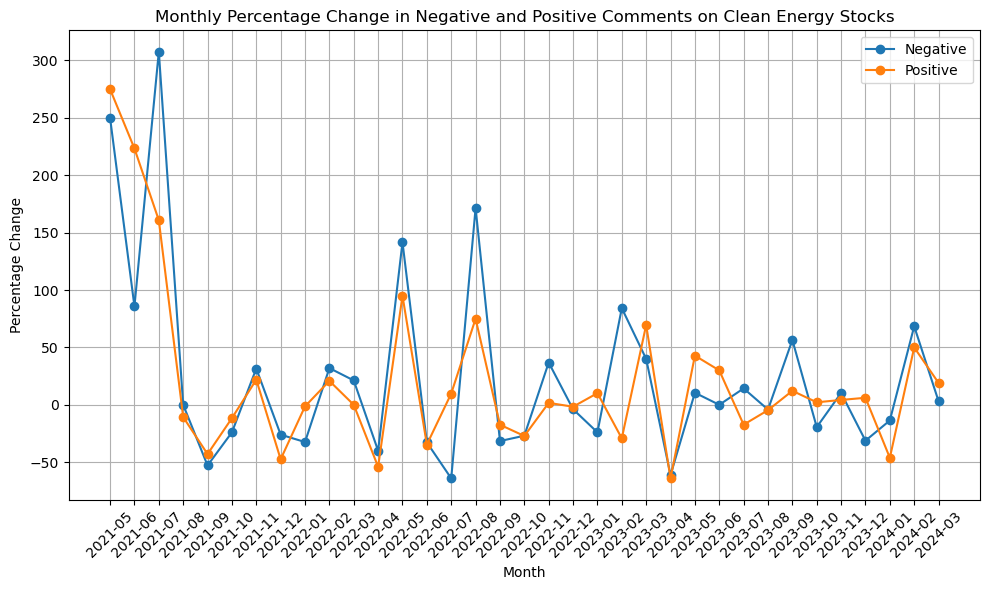

In [ ]:
# Remove NaN values
negative_monthly_percentage.dropna(inplace=True)
positive_monthly_percentage.dropna(inplace=True)

# Sort the DataFrame by the index (months)
negative_monthly_percentage = negative_monthly_percentage.sort_index()
positive_monthly_percentage = positive_monthly_percentage.sort_index()

# Plot the percentage change
plt.figure(figsize=(10, 6))

plt.plot(negative_monthly_percentage.index.astype(str), negative_monthly_percentage.values, label='Negative', marker='o')
plt.plot(positive_monthly_percentage.index.astype(str), positive_monthly_percentage.values, label='Positive', marker='o')

plt.title('Monthly Percentage Change in Negative and Positive Comments on Clean Energy Stocks')
plt.xlabel('Month')
plt.ylabel('Percentage Change')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
print(oil_price['DCOILWTICO'].dtype)
print(oil_price['DCOILWTICO'].unique())


object
['133.92' '138.91' '139.69' ... '77.09' '79.65' '78.72']


In [ ]:

#file path
file_path = "C:/Users/hbrun/Downloads/Crude_Oil_Prices (1).csv"

# Read the CSV file into a DataFrame
oil_price = pd.read_csv(file_path)

# Convert 'DCOILWTICO' column to numeric format
oil_price['DCOILWTICO'] = pd.to_numeric(oil_price['DCOILWTICO'], errors='coerce')

# Drop rows with missing or non-numeric values
oil_price.dropna(subset=['DCOILWTICO'], inplace=True)

# Convert 'DATE' column to datetime format
oil_price['DATE'] = pd.to_datetime(oil_price['DATE'])

# Set 'DATE' column as index
oil_price.set_index('DATE', inplace=True)

# Resample the data to monthly frequency and calculate the mean price for each month
mon_avg_prices = oil_price['DCOILWTICO'].resample('M').mean()

# Change month labels to the first day of each month
mon_avg_prices.index = mon_avg_prices.index.strftime('%Y-%m')

# Select the data for the desired date range (from May 2021 to February 2024)
s_data = mon_avg_prices['2021-05':'2024-02']

s_data

DATE
2021-05     65.169500
2021-06     71.378182
2021-07     72.485238
2021-08     67.730455
2021-09     71.646190
2021-10     81.476667
2021-11     79.147500
2021-12     71.711818
2022-01     83.222000
2022-02     91.641053
2022-03    108.502609
2022-04    101.777500
2022-05    109.552381
2022-06    114.837143
2022-07    101.619000
2022-08     93.665217
2022-09     84.258095
2022-10     87.554762
2022-11     84.370476
2022-12     76.437143
2023-01     78.123000
2023-02     76.832632
2023-03     73.277826
2023-04     79.446316
2023-05     71.578182
2023-06     70.248095
2023-07     76.069500
2023-08     81.386087
2023-09     89.425000
2023-10     85.639524
2023-11     77.685000
2023-12     71.900000
2024-01     74.152381
2024-02     76.296923
Name: DCOILWTICO, dtype: float64

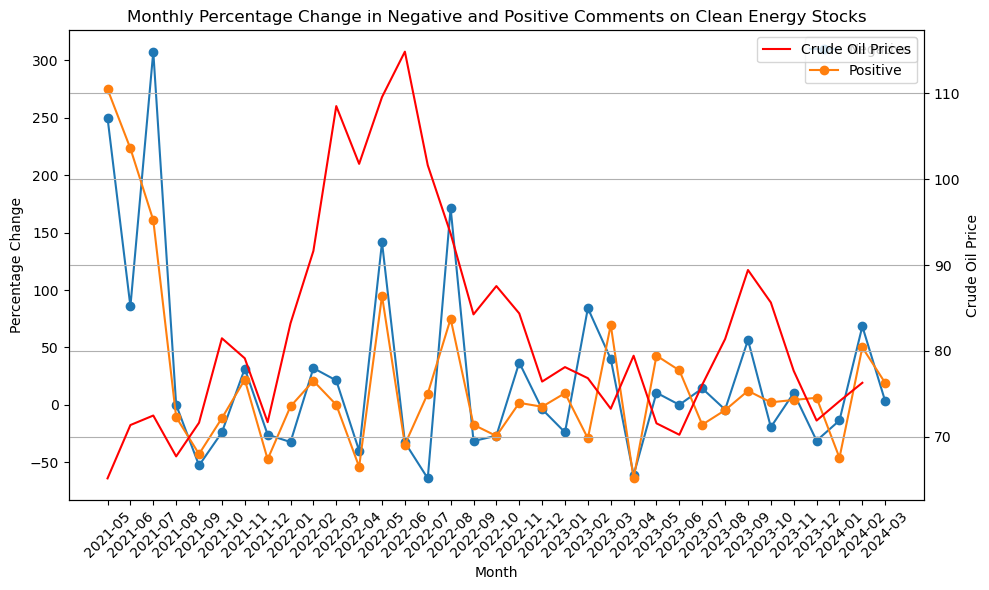

In [ ]:
import matplotlib.pyplot as plt

# Plot the percentage change
plt.figure(figsize=(10, 6))

# Plot negative and positive monthly percentages
plt.plot(negative_monthly_percentage.index.astype(str), negative_monthly_percentage.values, label='Negative', marker='o')
plt.plot(positive_monthly_percentage.index.astype(str), positive_monthly_percentage.values, label='Positive', marker='o')

# Set title and labels for the primary y-axis
plt.title('Monthly Percentage Change in Negative and Positive Comments on Clean Energy Stocks')
plt.xlabel('Month')
plt.ylabel('Percentage Change')

# Add legend and rotate x-axis labels
plt.legend()
plt.xticks(rotation=45)

# Create secondary y-axis for oil prices
ax2 = plt.gca().twinx()
ax2.plot(s_data.index, s_data.values, color='red', label='Crude Oil Prices')

# Set label and legend for secondary y-axis
ax2.set_ylabel('Crude Oil Price')
ax2.legend(loc='upper right')

# Show grid and adjust layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


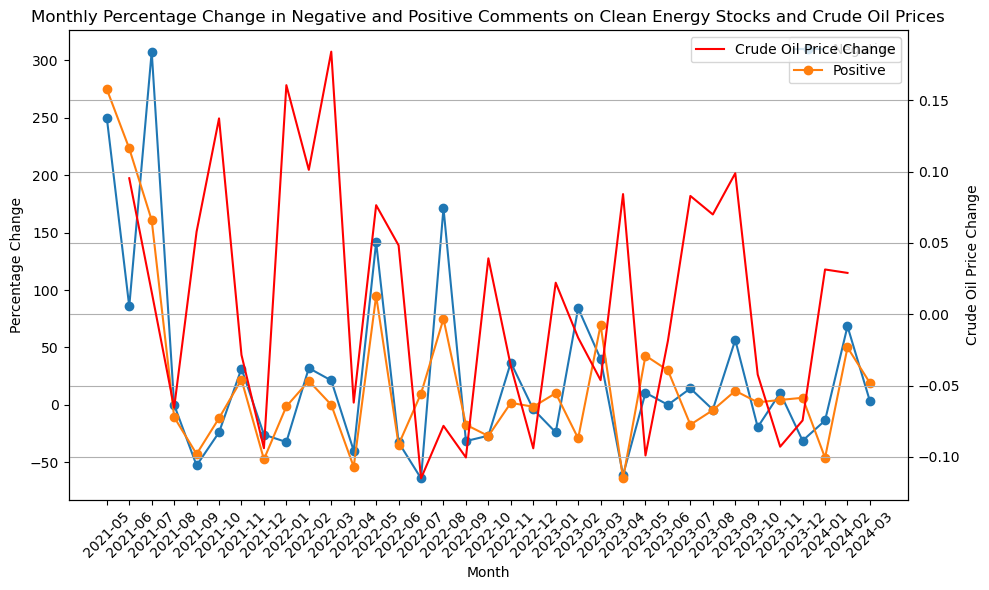

In [ ]:
# Calculate the percentage change in oil price per month
oil_price_change = s_data.pct_change()

# Plot the percentage change
plt.figure(figsize=(10, 6))

# Plot negative and positive monthly percentages
plt.plot(negative_monthly_percentage.index.astype(str), negative_monthly_percentage.values, label='Negative', marker='o')
plt.plot(positive_monthly_percentage.index.astype(str), positive_monthly_percentage.values, label='Positive', marker='o')

# Set title and labels for the primary y-axis
plt.title('Monthly Percentage Change in Negative and Positive Comments on Clean Energy Stocks and Crude Oil Prices')
plt.xlabel('Month')
plt.ylabel('Percentage Change')

# Add legend and rotate x-axis labels
plt.legend()
plt.xticks(rotation=45)

# Create secondary y-axis for oil prices
ax2 = plt.gca().twinx()
ax2.plot(oil_price_change.index, oil_price_change.values, color='red', label='Crude Oil Price Change')

# Set label and legend for secondary y-axis
ax2.set_ylabel('Crude Oil Price Change')
ax2.legend(loc='upper right')

# Show grid and adjust layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Reset indices of both Series objects
negative_monthly_percentage_trimmed.reset_index(drop=True, inplace=True)
oil_price_change_shifted_trimmed.reset_index(drop=True, inplace=True)

# Calculate correlation between negative comments change and trimmed shifted oil price change
correlation = np.corrcoef(negative_monthly_percentage_trimmed, oil_price_change_shifted_trimmed)[0, 1]

print("Correlation between negative comments change and oil price change (shifted by one month):", correlation)


Correlation between negative comments change and oil price change (shifted by one month): nan
